In [1]:
import ast
a_file = open("Gimagenet.txt", "r")
# a_file = open("Gibbon_panda.txt", "r")
# a_file = open("Gimagenet_Test_2.txt", "r")


string_without_line_breaks = ""
for line in a_file:
    stripped_line = line.rstrip()
    string_without_line_breaks += stripped_line

import re
dict_Classes = ast.literal_eval(re.search('({.+})', string_without_line_breaks).group(0))

# for key, value in dict_Classes.items():
#     print ('classId', key)
#     print ('value', value)
a_file.close()
#print(dict_Classes)

In [29]:
from scipy.spatial import distance
import collections


import numpy as np
from keras import backend as K
import os
import scipy as sp

import matplotlib.pyplot as plt
import networkx as nx

def distOneToMany (k1, thresh):
    # G = nx.Graph()
    G = nx.Graph()
    # draw_graph(G)


    print(' length dict', len(dict_Classes))
    class_index =0
    for key, value in dict_Classes.items():
        class_index +=1
#         print('currentindex', class_index)
        weights_dic_Conv2_13= {}
        weights_dic_Conv2_13.update(value)
        weights_dic_Conv2_13 = sorted (weights_dic_Conv2_13.items ())
        
        if key==k1:
            for key2, value2 in dict_Classes.items():
                if (key != key2):
                    weights_dic_Conv2_13_2= {}
            #         print ('Key:', key)
            #         if key != key2 : #classs_Id 
                    weights_dic_Conv2_13_2.update(value2)
                    weights_dic_Conv2_13_2 = sorted (weights_dic_Conv2_13_2.items ())
            #         sorted (weights_dic_Conv2_13, key=lambda kv: kv[1], reverse=True)
            #         sorted (weights_dic_Conv2_13_2, key=lambda kv: kv[1], reverse=True)

                    totalProb = 0
                    totalProb2 = 0
                    totalSimilarity = 0

                    for i in range(len(weights_dic_Conv2_13)):
                    #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                        if weights_dic_Conv2_13[i][1][0] > 0:
                            totalProb =  totalProb + weights_dic_Conv2_13[i][1][0]
    #                     else:
    #                         weights_dic_Conv2_13[i][1][0] = 0
            #             print('tot prob1', totalProb)

                    for i in range(len(weights_dic_Conv2_13_2)):
                    #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                        if weights_dic_Conv2_13_2[i][1][0] > 0:
                            totalProb2 =  totalProb2 + weights_dic_Conv2_13_2[i][1][0]
            #         print('total prob2', totalProb2)
    #                         else:
    #                     weights_dic_Conv2_13[i][1][0] = 0

                    od = collections.OrderedDict(weights_dic_Conv2_13)
                    od2 = collections.OrderedDict(weights_dic_Conv2_13_2)
                    # ### Product
                    # for i in range(len(od)):
                    #     totalSimilarity += od[i][0] * od2[i][0]
                    #### Distance
                    odList = []
                    od2List = []
                    for i in range(len(od)):
                            odList.append(weights_dic_Conv2_13[i][1][0]/totalProb)     ## /totalprob gives the same results
                            od2List.append(weights_dic_Conv2_13_2[i][1][0]/totalProb2)  
            #         for i in range(len(od)):
            #                 odList.append(weights_dic_Conv2_13[i][1][0]/totalProb)     ## /totalprob gives the same results
            #                 od2List.append(weights_dic_Conv2_13_2[i][1][0]/totalProb2)  

            #         for i in range(len(od)):
            #             print('value',i, odList[i])
            #         for i in range(len(od)):
            #             print('value',i, od2List[i])
                    totalSimilarity = distance.cosine(odList, od2List) # One edge value
                    if(totalSimilarity <= thresh):
                        print('total sim between '+ key+ 'and '+ key2+ ':', totalSimilarity)
                        G.add_edge(key, key2, weight=round(totalSimilarity, 6), name = 'weight', title=round(totalSimilarity, 6))
    return G
        #         arry_by_object.append (totalSimilarity)
        #     adjacency_Matrix.append(arry_by_object)

 length dict 1000
total sim between n01817953and n01622779: 0.038088546594588935
total sim between n01817953and n01833805: 0.38147819365408997
total sim between n01817953and n02120505: 0.17992477523730954
total sim between n01817953and n03000247: 0.06011716080662821
total sim between n01817953and n02514041: 0.26532907891014024


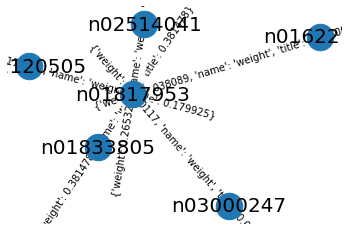

In [116]:
G = distOneToMany("n01817953", 0.4)

import matplotlib.pyplot as plt
import networkx as nx

from scipy.spatial import distance
import collections


import numpy as np
from keras import backend as K
import os
import scipy as sp

import matplotlib.pyplot as plt
import networkx as nx

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.9]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
# edge_labels = nx.get_edge_attributes(G, 'name')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
nx.draw_networkx_edge_labels(G, pos, edgelist=elarge, width=3)

# nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
#delete edges with low similaaities
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
# ) 


# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

from pyvis.network import Network
net = Network(notebook= True)
# load the network graph
net.from_nx(G)
net.show("examp.html")


In [10]:
# def draw_graph(graph, labels=None, graph_layout='shell',
#                node_size=1600, node_color='red', node_alpha=0.3,
#                node_text_size=5,
#                edge_color='blue', edge_alpha=0.3, edge_tickness=1,
#                edge_text_pos=0.3,
#                text_font='sans-serif'):

#     # create networkx graph
#     G=nx.Graph()

# Computing the similarity between classes; pearson or cosine distances might be used

In [3]:
from scipy.spatial import distance
import collections


import numpy as np
from keras import backend as K
import os
import scipy as sp

import matplotlib.pyplot as plt
import networkx as nx

# G = nx.Graph()
G = nx.Graph()
# draw_graph(G)
thresh = 0.5

print(' length dict', len(dict_Classes))
class_index =0
adjacency_Matrix = []
for key, value in dict_Classes.items():
    class_index +=1
    print('currentindex', class_index)
    weights_dic_Conv2_13= {}
    weights_dic_Conv2_13.update(value)
    weights_dic_Conv2_13 = sorted (weights_dic_Conv2_13.items ())
    odList = []
    od = collections.OrderedDict(weights_dic_Conv2_13)
    for i in range(len(od)):
        odList.append(weights_dic_Conv2_13[i][1][0]) 
    arry_by_object =[]
    for key2, value2 in dict_Classes.items():
        if (key != key2):
            weights_dic_Conv2_13_2= {}
    #         print ('Key:', key)
    #         if key != key2 : #classs_Id 
            weights_dic_Conv2_13_2.update(value2)
            weights_dic_Conv2_13_2 = sorted (weights_dic_Conv2_13_2.items ())
    #         sorted (weights_dic_Conv2_13, key=lambda kv: kv[1], reverse=True)
    #         sorted (weights_dic_Conv2_13_2, key=lambda kv: kv[1], reverse=True)

            totalProb = 0
            totalProb2 = 0
            totalSimilarity = 0

            for i in range(len(weights_dic_Conv2_13)):
            #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                if weights_dic_Conv2_13[i][1][0] > 0:
                    totalProb =  totalProb + weights_dic_Conv2_13[i][1][0]
    #             print('tot prob1', totalProb)
#                 else:
#                     weights_dic_Conv2_13[i][1][0] = 0

            for i in range(len(weights_dic_Conv2_13_2)):
            #     print('value:', weights_dic_Conv2_13_Umb1[i][0])
                if weights_dic_Conv2_13_2[i][1][0] > 0:
                    totalProb2 =  totalProb2 + weights_dic_Conv2_13_2[i][1][0]
    #         print('total prob2', totalProb2)
#                 else:
#                     weights_dic_Conv2_13[i][1][0] = 0            
            od2 = collections.OrderedDict(weights_dic_Conv2_13_2)
            # ### Product
            # for i in range(len(od)):
            #     totalSimilarity += od[i][0] * od2[i][0]
            #### Distance
            od2List = []
            for i in range(len(od)):
#                     odList.append(weights_dic_Conv2_13[i][1][0])     ## /totalprob gives the same results
                    od2List.append(weights_dic_Conv2_13_2[i][1][0])  
            from scipy.stats import pearsonr
            from scipy.spatial import distance
            totalSimilarity, _ = pearsonr(odList, od2List)
            if(totalSimilarity >= thresh):
                print('total sim between '+ key+ 'and '+ key2+ ':', totalSimilarity)                
                G.add_edge(key, key2, weight=round(totalSimilarity, 6), name = 'weight', title=round(totalSimilarity, 6))
    print('------------------------------------------')
#         arry_by_object.append (totalSimilarity)
#     adjacency_Matrix.append(arry_by_object)

 length dict 1000
currentindex 1
total sim between n01440764and n04067472: 0.6076268836341945
total sim between n01440764and n02536864: 0.5097044544818737
total sim between n01440764and n02641379: 0.7286817146894282
------------------------------------------
currentindex 2
total sim between n01443537and n01631663: 0.8045463224327744
total sim between n01443537and n02007558: 0.9994227222457548
total sim between n01443537and n02009229: 0.9992663885684568
total sim between n01443537and n02012849: 0.94474620006129
total sim between n01443537and n03662601: 0.9116750608274395
------------------------------------------
currentindex 3
total sim between n01484850and n02066245: 0.6288061425366714
------------------------------------------
currentindex 4
total sim between n01491361and n01496331: 0.5387597602560924
total sim between n01491361and n01768244: 0.5661848875099205
total sim between n01491361and n01860187: 0.5145084801512751
total sim between n01491361and n01968897: 0.5026227460654111
to

total sim between n01632777and n02177972: 0.6664104271874243
total sim between n01632777and n04033901: 0.5500456395859809
------------------------------------------
currentindex 31
total sim between n01641577and n01644900: 0.5268268840185074
------------------------------------------
currentindex 32
total sim between n01644373and n01749939: 0.5551820992830758
total sim between n01644373and n01828970: 0.6589855932306854
total sim between n01644373and n04409515: 0.8321983650585126
total sim between n01644373and n07742313: 0.7482204556881697
------------------------------------------
currentindex 33
total sim between n01644900and n01641577: 0.5268268840185074
------------------------------------------
currentindex 34
------------------------------------------
currentindex 35
------------------------------------------
currentindex 36
------------------------------------------
currentindex 37
total sim between n01667778and n01873310: 0.5762744783707665
total sim between n01667778and n028145

------------------------------------------
currentindex 52
total sim between n01704323and n01692333: 0.5394495938260745
total sim between n01704323and n01774750: 0.5662789711149442
total sim between n01704323and n01860187: 0.6170006581878424
total sim between n01704323and n01873310: 0.5481910836198949
total sim between n01704323and n01968897: 0.6019018744396267
total sim between n01704323and n02074367: 0.5633313221213037
total sim between n01704323and n02097298: 0.510983951052067
total sim between n01704323and n02117135: 0.5029219631462462
total sim between n01704323and n02317335: 0.520983117718579
total sim between n01704323and n04026417: 0.5311270486916736
total sim between n01704323and n04270147: 0.5904098766969996
total sim between n01704323and n04540053: 0.5124882261795956
total sim between n01704323and n04548280: 0.5953436534387904
total sim between n01704323and n03866082: 0.5061535860583534
total sim between n01704323and n02869837: 0.6323087186040236
----------------------------

total sim between n01795545and n07734744: 0.5052931915087325
total sim between n01795545and n09256479: 0.518255519033882
total sim between n01795545and n09421951: 0.5567290878425025
total sim between n01795545and n03866082: 0.5647364863623445
total sim between n01795545and n02690373: 0.558813762735414
total sim between n01795545and n02835271: 0.5487817966226146
total sim between n01795545and n02869837: 0.6720680117950307
total sim between n01795545and n02643566: 0.5380124578211534
total sim between n01795545and n02655020: 0.552053578036528
------------------------------------------
currentindex 82
total sim between n01796340and n01824575: 0.8104577397075196
total sim between n01796340and n02486261: 0.8666361967064818
------------------------------------------
currentindex 83
------------------------------------------
currentindex 84
total sim between n01798484and n01774384: 0.5953590196344977
total sim between n01798484and n01795545: 0.8091467505764293
total sim between n01798484and n0

total sim between n01860187and n02988304: 0.540414965095966
total sim between n01860187and n02447366: 0.5747987662117265
total sim between n01860187and n02643566: 0.7192370080081582
total sim between n01860187and n02655020: 0.7319765076703921
------------------------------------------
currentindex 102
------------------------------------------
currentindex 103
------------------------------------------
currentindex 104
total sim between n01873310and n01667778: 0.5762744783707665
total sim between n01873310and n01675722: 0.5152815886388635
total sim between n01873310and n01692333: 0.7002646557758346
total sim between n01873310and n01697457: 0.5699779434741042
total sim between n01873310and n01704323: 0.5481910836198949
total sim between n01873310and n01735189: 0.5400690271959223
total sim between n01873310and n01774750: 0.615900211216659
total sim between n01873310and n01795545: 0.5891223158860814
total sim between n01873310and n01860187: 0.8112130727032016
total sim between n01873310an

total sim between n01968897and n04398044: 0.5588813510188352
total sim between n01968897and n04428191: 0.5224612276619867
total sim between n01968897and n04523525: 0.5698907324791522
total sim between n01968897and n04540053: 0.7311136376803817
total sim between n01968897and n04548280: 0.8599777828118311
total sim between n01968897and n04550184: 0.5366393238026872
total sim between n01968897and n04552348: 0.6541327068175325
total sim between n01968897and n07248320: 0.5003293887392486
total sim between n01968897and n07734744: 0.6639697520850691
total sim between n01968897and n07753113: 0.6501455850626033
total sim between n01968897and n09256479: 0.6821410699248469
total sim between n01968897and n09421951: 0.6901786828876648
total sim between n01968897and n03590841: 0.5182291090671338
total sim between n01968897and n03720891: 0.5416947470376654
total sim between n01968897and n03733805: 0.6546889245208752
total sim between n01968897and n03764736: 0.5028544329026539
total sim between n01968

total sim between n02037110and n01582220: 0.9244408594474901
total sim between n02037110and n02028035: 0.8643933580401529
------------------------------------------
currentindex 145
------------------------------------------
currentindex 146
total sim between n02056570and n01843383: 0.8422563714534813
------------------------------------------
currentindex 147
total sim between n02058221and n02974003: 0.5718866363787847
------------------------------------------
currentindex 148
total sim between n02066245and n01484850: 0.6288061425366714
total sim between n02066245and n09332890: 0.5632193062272269
------------------------------------------
currentindex 149
------------------------------------------
currentindex 150
total sim between n02074367and n01692333: 0.6648674097581132
total sim between n02074367and n01697457: 0.543565585497623
total sim between n02074367and n01704323: 0.5633313221213037
total sim between n02074367and n01735189: 0.5121470557995127
total sim between n02074367and 

total sim between n02091134and n04252225: 0.6562545920165562
------------------------------------------
currentindex 174
total sim between n02091244and n01692333: 0.5349149559674015
total sim between n02091244and n01860187: 0.6309720800379249
total sim between n02091244and n01873310: 0.5698993975395479
total sim between n02091244and n01968897: 0.6488037654690806
total sim between n02091244and n02074367: 0.5463636548216315
total sim between n02091244and n02097298: 0.5256487711248631
total sim between n02091244and n02102480: 0.5491972531264514
total sim between n02091244and n02117135: 0.5509608653655581
total sim between n02091244and n02395406: 0.6118690270925955
total sim between n02091244and n03208938: 0.5080435502451612
total sim between n02091244and n04026417: 0.5440533314267914
total sim between n02091244and n04270147: 0.6138465188379116
total sim between n02091244and n04355338: 0.5049527424050431
total sim between n02091244and n04540053: 0.5391130073821238
total sim between n020912

total sim between n02097298and n07734744: 0.5534327060652181
total sim between n02097298and n09256479: 0.5442989839200433
total sim between n02097298and n09421951: 0.5700546485232519
total sim between n02097298and n03733805: 0.5319138544420965
total sim between n02097298and n03814906: 0.5296039991416069
total sim between n02097298and n03866082: 0.6143061864569729
total sim between n02097298and n02690373: 0.5634787851243069
total sim between n02097298and n02795169: 0.5310776387077928
total sim between n02097298and n02834397: 0.5040810470993448
total sim between n02097298and n02835271: 0.5664051896518214
total sim between n02097298and n02869837: 0.7430035238800664
total sim between n02097298and n02442845: 0.520610464645289
total sim between n02097298and n02643566: 0.6001571092699597
total sim between n02097298and n02655020: 0.6008329199835185
------------------------------------------
currentindex 201
total sim between n02097474and n02098105: 0.579704491146651
total sim between n02097474

total sim between n02102480and n02395406: 0.5763904660241748
total sim between n02102480and n04026417: 0.5280683299130485
total sim between n02102480and n04270147: 0.580025158058583
total sim between n02102480and n04540053: 0.5002517909471407
total sim between n02102480and n04548280: 0.5973875946582217
total sim between n02102480and n03866082: 0.5228040629032215
total sim between n02102480and n02869837: 0.610163675819432
------------------------------------------
currentindex 222
total sim between n02102973and n02088094: 0.5736504232229508
------------------------------------------
currentindex 223
total sim between n02104029and n01819313: 0.5898238363315335
total sim between n02104029and n02114548: 0.5600112823638941
total sim between n02104029and n07614500: 0.5006868736473087
------------------------------------------
currentindex 224
total sim between n02104365and n02099267: 0.7688272901929747
total sim between n02104365and n02442845: 0.6017614161830208
-----------------------------

------------------------------------------
currentindex 264
------------------------------------------
currentindex 265
------------------------------------------
currentindex 266
------------------------------------------
currentindex 267
total sim between n02113712and n02096437: 0.504658111450022
total sim between n02113712and n02098105: 0.5491161501255662
total sim between n02113712and n02102318: 0.5579953846498226
------------------------------------------
currentindex 268
total sim between n02113799and n02088094: 0.8095714767295267
------------------------------------------
currentindex 269
total sim between n02113978and n02092339: 0.7035551557528353
total sim between n02113978and n02093647: 0.7187819849802746
total sim between n02113978and n02444819: 0.702779327683092
------------------------------------------
currentindex 270
------------------------------------------
currentindex 271
total sim between n02114548and n01819313: 0.9102952560838966
total sim between n02114548and n02

------------------------------------------
currentindex 294
total sim between n02130308and n02117135: 0.6251332266106631
total sim between n02130308and n02123394: 0.6096842133906449
------------------------------------------
currentindex 295
total sim between n02132136and n01943899: 0.5284050856676792
total sim between n02132136and n02134084: 0.7440341388581815
------------------------------------------
currentindex 296
------------------------------------------
currentindex 297
total sim between n02134084and n02132136: 0.7440341388581815
total sim between n02134084and n02488291: 0.5038751781036016
------------------------------------------
currentindex 298
total sim between n02134418and n02483708: 0.8991570797683271
------------------------------------------
currentindex 299
total sim between n02137549and n01622779: 0.5221482986092335
total sim between n02137549and n01817953: 0.5143760905992694
total sim between n02137549and n02120505: 0.5408918745042129
total sim between n02137549and

total sim between n02356798and n03840681: 0.7405583567669359
total sim between n02356798and n02606052: 0.759563380700367
------------------------------------------
currentindex 337
total sim between n02361337and n02110958: 0.5763058144365081
total sim between n02361337and n02116738: 0.5353732772115676
------------------------------------------
currentindex 338
total sim between n02363005and n02356798: 0.9085807622954087
total sim between n02363005and n02364673: 0.9023496764185813
total sim between n02363005and n03840681: 0.7293745858439336
total sim between n02363005and n02606052: 0.7191028951449203
------------------------------------------
currentindex 339
total sim between n02364673and n02356798: 0.8908746613919922
total sim between n02364673and n02363005: 0.9023496764185813
total sim between n02364673and n03840681: 0.7091625774344928
total sim between n02364673and n02606052: 0.6769145166214069
------------------------------------------
currentindex 340
total sim between n02389026an

total sim between n03207743and n03980874: 0.5167048662219782
------------------------------------------
currentindex 385
total sim between n03207941and n04204347: 0.66838803749731
------------------------------------------
currentindex 386
total sim between n03208938and n01692333: 0.6190348390135748
total sim between n03208938and n01774750: 0.5137429213468242
total sim between n03208938and n01795545: 0.5318166627518205
total sim between n03208938and n01860187: 0.6936554477567489
total sim between n03208938and n01873310: 0.6437428955520375
total sim between n03208938and n01968897: 0.6890374372778503
total sim between n03208938and n02074367: 0.6139755011697466
total sim between n03208938and n02091244: 0.5080435502451612
total sim between n03208938and n02097298: 0.5667941947893504
total sim between n03208938and n02098413: 0.5301894992198922
total sim between n03208938and n02117135: 0.5605563700821514
total sim between n03208938and n02229544: 0.5389541795641927
total sim between n03208938a

------------------------------------------
currentindex 419
------------------------------------------
currentindex 420
------------------------------------------
currentindex 421
------------------------------------------
currentindex 422
total sim between n03425413and n03717622: 0.9286000463523367
total sim between n03425413and n02892201: 0.7618794960425405
------------------------------------------
currentindex 423
total sim between n03443371and n01860187: 0.5228123830033963
total sim between n03443371and n01968897: 0.5176967158894145
total sim between n03443371and n04270147: 0.530262381282436
total sim between n03443371and n04548280: 0.5360385530890657
total sim between n03443371and n03720891: 0.5671832018587761
total sim between n03443371and n02869837: 0.5393773650411305
------------------------------------------
currentindex 424
total sim between n03444034and n04487081: 0.6428684033237299
total sim between n03444034and n02930766: 0.5158322026682434
-------------------------------

total sim between n03933933and n04366367: 0.5932654140403621
------------------------------------------
currentindex 470
------------------------------------------
currentindex 471
------------------------------------------
currentindex 472
------------------------------------------
currentindex 473
total sim between n03942813and n03982430: 0.859367285368962
total sim between n03942813and n04039381: 0.7345329556072719
total sim between n03942813and n04258138: 0.5004438899961117
------------------------------------------
currentindex 474
------------------------------------------
currentindex 475
total sim between n03947888and n02105251: 0.581001405259624
------------------------------------------
currentindex 476
------------------------------------------
currentindex 477
------------------------------------------
currentindex 478
total sim between n03956157and n03272010: 0.5183076673867081
total sim between n03956157and n03788195: 0.598350952835795
total sim between n03956157and n0267

------------------------------------------
currentindex 505
------------------------------------------
currentindex 506
total sim between n04044716and n02276258: 0.5372063525366433
------------------------------------------
currentindex 507
total sim between n04049303and n04023962: 0.5099477393990438
------------------------------------------
currentindex 508
total sim between n04065272and n04146614: 0.6404088429334291
------------------------------------------
currentindex 509
total sim between n04067472and n01440764: 0.6076268836341945
total sim between n04067472and n02641379: 0.5278103875430691
------------------------------------------
currentindex 510
------------------------------------------
currentindex 511
------------------------------------------
currentindex 512
total sim between n04074963and n01632458: 0.5047047146937235
total sim between n04074963and n01692333: 0.527013548186842
total sim between n04074963and n01860187: 0.6713687662330973
total sim between n04074963and n0

total sim between n04243546and n03197337: 0.8732797978301013
total sim between n04243546and n02977058: 0.5114163305936966
------------------------------------------
currentindex 552
total sim between n04251144and n01518878: 0.5893919082885836
total sim between n04251144and n01558993: 0.6041647098769926
total sim between n04251144and n01692333: 0.5669196513882965
total sim between n04251144and n01774750: 0.5267703706994802
total sim between n04251144and n01860187: 0.7207808035293188
total sim between n04251144and n01873310: 0.5993613247664928
total sim between n04251144and n01968897: 0.6509520629871267
total sim between n04251144and n02074367: 0.5737562446295571
total sim between n04251144and n02097298: 0.5740453493557933
total sim between n04251144and n02117135: 0.5493204439061897
total sim between n04251144and n03208938: 0.5180976398482626
total sim between n04251144and n04026417: 0.577579121487324
total sim between n04251144and n04270147: 0.6390842266181814
total sim between n0425114

total sim between n04285008and n04517823: 0.6914173038003382
------------------------------------------
currentindex 569
------------------------------------------
currentindex 570
------------------------------------------
currentindex 571
------------------------------------------
currentindex 572
------------------------------------------
currentindex 573
total sim between n04311174and n03250847: 0.684514061641373
------------------------------------------
currentindex 574
total sim between n04317175and n03483316: 0.6142117010219638
total sim between n04317175and n03538406: 0.5128657645333673
------------------------------------------
currentindex 575
total sim between n04325704and n07831146: 0.9277929132524562
total sim between n04325704and n03877845: 0.8672015132815576
------------------------------------------
currentindex 576
total sim between n04326547and n03042490: 0.6446682122694899
------------------------------------------
currentindex 577
total sim between n04328186and n03

total sim between n04428191and n01860187: 0.5471849004985593
total sim between n04428191and n01968897: 0.5224612276619867
total sim between n04428191and n04270147: 0.5100947571493375
total sim between n04428191and n04548280: 0.543756221483776
total sim between n04428191and n02869837: 0.5536953635276691
------------------------------------------
currentindex 608
------------------------------------------
currentindex 609
------------------------------------------
currentindex 610
total sim between n04442312and n03000684: 0.5983805260720326
------------------------------------------
currentindex 611
total sim between n04443257and n03089624: 0.6122831101285778
------------------------------------------
currentindex 612
------------------------------------------
currentindex 613
------------------------------------------
currentindex 614
------------------------------------------
currentindex 615
total sim between n04461696and n03495258: 0.7662593340353183
total sim between n04461696and n0

total sim between n04548280and n02117135: 0.7238198397157664
total sim between n04548280and n02123394: 0.5809713461416074
total sim between n04548280and n02229544: 0.5562411301042255
total sim between n04548280and n02317335: 0.5222374149503031
total sim between n04548280and n02319095: 0.5491337472577431
total sim between n04548280and n02326432: 0.5588321843110741
total sim between n04548280and n02391049: 0.5634049341661987
total sim between n04548280and n02397096: 0.5189093797691905
total sim between n04548280and n02410509: 0.5092752151741032
total sim between n04548280and n03208938: 0.6902749494856936
total sim between n04548280and n03271574: 0.5916618053663445
total sim between n04548280and n03347037: 0.5076501371617815
total sim between n04548280and n03355925: 0.5113461047561684
total sim between n04548280and n03443371: 0.5360385530890657
total sim between n04548280and n03461385: 0.5007036436581207
total sim between n04548280and n03483316: 0.5936214049974807
total sim between n04548

------------------------------------------
currentindex 672
total sim between n07248320and n01860187: 0.5111113239441168
total sim between n07248320and n01968897: 0.5003293887392486
total sim between n07248320and n04548280: 0.5022579822428795
total sim between n07248320and n02869837: 0.5204774247852288
------------------------------------------
currentindex 673
------------------------------------------
currentindex 674
------------------------------------------
currentindex 675
------------------------------------------
currentindex 676
total sim between n07584110and n02105641: 0.9867816862857925
total sim between n07584110and n02110063: 0.5547055814253178
total sim between n07584110and n02111889: 0.6647524179971374
total sim between n07584110and n02112018: 0.8877482502607159
------------------------------------------
currentindex 677
total sim between n07590611and n03089624: 0.6256918659091126
------------------------------------------
currentindex 678
total sim between n07613480and 

------------------------------------------
currentindex 716
total sim between n07880968and n02088632: 0.7384516689012235
total sim between n07880968and n02089973: 0.9525523404661811
total sim between n07880968and n02101556: 0.5576932633392953
total sim between n07880968and n02102177: 0.566877815290456
total sim between n07880968and n02105412: 0.9394848145878351
------------------------------------------
currentindex 717
total sim between n07892512and n04579145: 0.5903726965821096
total sim between n07892512and n03690938: 0.5965416767064642
total sim between n07892512and n03871628: 0.5926201271007724
------------------------------------------
currentindex 718
total sim between n07920052and n07754684: 0.5384508190439152
total sim between n07920052and n02823750: 0.6540542329583329
total sim between n07920052and n02509815: 0.5832061094977657
------------------------------------------
currentindex 719
total sim between n07930864and n03133878: 0.6647033929787234
total sim between n07930864an

------------------------------------------
currentindex 749
------------------------------------------
currentindex 750
------------------------------------------
currentindex 751
------------------------------------------
currentindex 752
total sim between n03534580and n04380533: 0.6924769066758855
total sim between n03534580and n04613696: 0.652868247994421
------------------------------------------
currentindex 753
------------------------------------------
currentindex 754
total sim between n03538406and n03483316: 0.5320397546572714
total sim between n03538406and n04317175: 0.5128657645333673
------------------------------------------
currentindex 755
total sim between n03544143and n03018349: 0.8764127905325766
total sim between n03544143and n02484975: 0.6695156362195046
------------------------------------------
currentindex 756
------------------------------------------
currentindex 757
------------------------------------------
currentindex 758
total sim between n03590841and n018

total sim between n03733805and n02643566: 0.5385697366563107
total sim between n03733805and n02655020: 0.5359017175068663
------------------------------------------
currentindex 799
------------------------------------------
currentindex 800
total sim between n03743016and n03837869: 0.6988249022730695
------------------------------------------
currentindex 801
total sim between n03759954and n03459775: 0.7515102567880699
total sim between n03759954and n04265275: 0.7415014360065888
total sim between n03759954and n03843555: 0.5561587362216914
------------------------------------------
currentindex 802
total sim between n03761084and n03290653: 0.71101761122928
------------------------------------------
currentindex 803
total sim between n03763968and n07718747: 0.9641262774737506
total sim between n03763968and n02916936: 0.7915280832965637
------------------------------------------
currentindex 804
total sim between n03764736and n01860187: 0.5205243645454977
total sim between n03764736and n

total sim between n03866082and n02097298: 0.6143061864569729
total sim between n03866082and n02098413: 0.5955544629986254
total sim between n03866082and n02102480: 0.5228040629032215
total sim between n03866082and n02117135: 0.6135832135496465
total sim between n03866082and n02123394: 0.5009472171538015
total sim between n03866082and n02319095: 0.5521966516032458
total sim between n03866082and n03208938: 0.5761276491834532
total sim between n03866082and n03271574: 0.5326760956360586
total sim between n03866082and n03483316: 0.5054188401164849
total sim between n03866082and n04026417: 0.6434248084169234
total sim between n03866082and n04074963: 0.5577418745215151
total sim between n03866082and n04239074: 0.5205833395649435
total sim between n03866082and n04251144: 0.5662714750433915
total sim between n03866082and n04270147: 0.7264740199638275
total sim between n03866082and n04355338: 0.5507668453033219
total sim between n03866082and n04540053: 0.6334485273905326
total sim between n03866

total sim between n02788148and n03866082: 0.5045953831686841
total sim between n02788148and n02835271: 0.5561837468233455
total sim between n02788148and n02869837: 0.6257665637020725
total sim between n02788148and n02655020: 0.5047756190472699
------------------------------------------
currentindex 873
total sim between n02790996and n01917289: 0.5638489064769864
total sim between n02790996and n04153751: 0.6946349609900337
------------------------------------------
currentindex 874
total sim between n02791124and n03379051: 0.7429363264644416
total sim between n02791124and n03891251: 0.8954369943370329
total sim between n02791124and n04099969: 0.6658815416294248
total sim between n02791124and n03599486: 0.7931654386131121
total sim between n02791124and n03785016: 0.5649045125001406
------------------------------------------
currentindex 875
total sim between n02791270and n02927161: 0.5714631189731315
------------------------------------------
currentindex 876
total sim between n02793495a

total sim between n02837789and n03710637: 0.6206509078631146
total sim between n02837789and n03710721: 0.8468482360451757
------------------------------------------
currentindex 897
total sim between n02840245and n04209239: 0.5622835376500612
------------------------------------------
currentindex 898
------------------------------------------
currentindex 899
------------------------------------------
currentindex 900
total sim between n02859443and n02017213: 0.5247488081389748
------------------------------------------
currentindex 901
------------------------------------------
currentindex 902
------------------------------------------
currentindex 903
total sim between n02869837and n01491361: 0.5191495859375214
total sim between n02869837and n01558993: 0.5598691776089867
total sim between n02869837and n01675722: 0.5199775680241081
total sim between n02869837and n01692333: 0.7739143245327438
total sim between n02869837and n01697457: 0.6444696359634723
total sim between n02869837and 

------------------------------------------
currentindex 921
total sim between n02948072and n03476991: 0.5501728370323992
total sim between n02948072and n07615774: 0.5390771711816611
------------------------------------------
currentindex 922
------------------------------------------
currentindex 923
total sim between n02951358and n03447447: 0.9765927713133274
total sim between n02951358and n03794056: 0.8769840629496501
------------------------------------------
currentindex 924
total sim between n02951585and n03476684: 0.5076011938546261
total sim between n02951585and n04125021: 0.6197570452456567
total sim between n02951585and n04579432: 0.684251288246235
------------------------------------------
currentindex 925
total sim between n02963159and n03877472: 0.7136126010428553
------------------------------------------
currentindex 926
total sim between n02965783and n04476259: 0.5517241323563611
------------------------------------------
currentindex 927
total sim between n02966193and n

------------------------------------------
currentindex 976
total sim between n02488702and n01592084: 0.6799256017008847
total sim between n02488702and n02445715: 0.9730154902175607
total sim between n02488702and n02447366: 0.662127807100855
total sim between n02488702and n02500267: 0.7693740250716156
total sim between n02488702and n02510455: 0.6728542578305788
------------------------------------------
currentindex 977
total sim between n02489166and n02487347: 0.9343401724034777
------------------------------------------
currentindex 978
------------------------------------------
currentindex 979
total sim between n02492035and n02493793: 0.7392359271647437
------------------------------------------
currentindex 980
------------------------------------------
currentindex 981
------------------------------------------
currentindex 982
total sim between n02493793and n02492035: 0.7392359271647437
------------------------------------------
currentindex 983
---------------------------------

------------------------------------------
currentindex 1000
------------------------------------------


# This option for showing the similarity as links between nodes

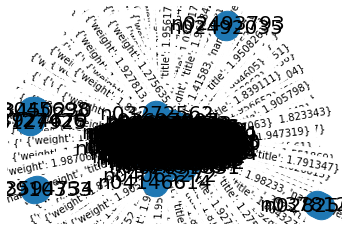

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.9]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
# edge_labels = nx.get_edge_attributes(G, 'name')
# nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
nx.draw_networkx_edge_labels(G, pos, edgelist=elarge, width=3)

# nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
#delete edges with low similaaities
# nx.draw_networkx_edges(
#     G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
# ) 


# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

In [4]:
from pyvis.network import Network
net = Network(notebook= True)
# load the network graph
net.from_nx(G)
net.show("exampFinal_New_Sim.html")

In [18]:
def slice_network(G, T, data = True):
    """ Remove all edges with weight<T from G or its copy. """
#     F = G.copy() if copy else G
    F = G
    F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w > T])
    return F

In [19]:
G_slice = slice_network(G, 0.6,data = True)
net.from_nx(G_slice)
net.show("examp2_slic.html")

In [20]:
# F = G.copy()
threshold = 0.5
G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w >= threshold])
# nx.draw(F)
net.from_nx(G)
net.show("example2.html")